In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [75]:
cancer = load_breast_cancer()

In [76]:
features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(cancer.target, columns=["TARGET"])

In [77]:
data = pd.concat([features,target], axis=1)

In [78]:
X = data["worst concave points"]
Y = data['TARGET']

In [79]:
X = np.array(X)
Y = np.array(Y)

In [80]:
X = X.reshape(-1,1)
#Y = Y.reshape(-1,1)

In [81]:
scaler = MinMaxScaler()

In [82]:
x = scaler.fit_transform(X)
#y = scaler.fit_transform(Y)


In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x,Y,test_size = 0.2)

In [84]:
regressor = LogisticRegression()

In [89]:
regressor.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
y_pred = regressor.predict(xtest)

In [91]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1])

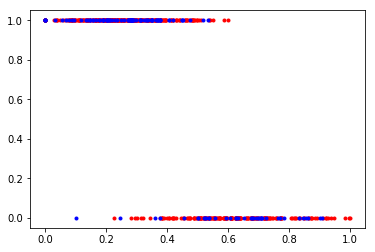

In [92]:
plt.plot(xtrain,ytrain,'r.',
        xtest,ytest,'b.')

In [93]:
cm = confusion_matrix(ytest,y_pred)

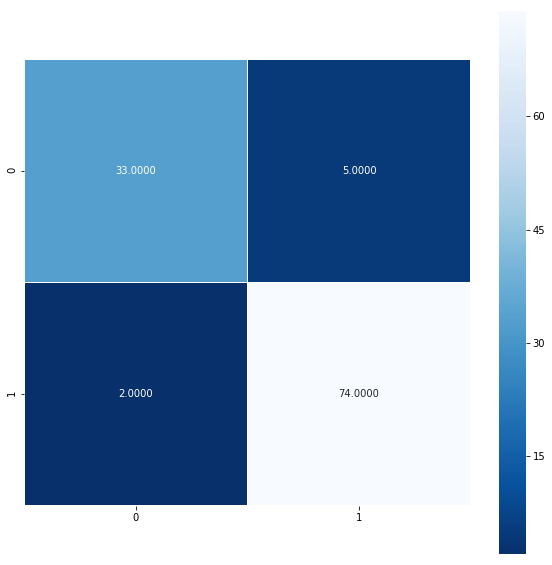

In [95]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,annot = True, fmt = ".4f",linewidth = .5, square = True, cmap = "Blues_r")

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.9385964912280702


In [100]:
#precision score is the number of  true positives of all actual positives
#recall score is the number of true positives out of all classified as positives
#f-score weighted average values of precision and recall, or to what degree model classifies the people 
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))
#f1-score = 2* p *r / p+r   or  2/(1/p + 1/r)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.94      0.97      0.95        76

   micro avg       0.94      0.94      0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

